                 area_name per_capita_income crimes
0              Rogers Park             23939      8
1               West Ridge             23040      4
2                   Uptown             35787      5
3           Lincoln Square             37524      2
4             North Center             57123      4
5                Lake View             60058      9
6             Lincoln Park             71551      9
7          Near North Side             88669     26
8              Edison Park             40959      0
9             Norwood Park             32875      1
10          Jefferson Park             27751      4
11             Forest Glen             44164      2
12              North Park             26576      1
13             Albany Park             21323      4
14            Portage Park             24336     10
15             Irving Park             27249      1
16                 Dunning             26282      5
17              Montclaire             22014      1
18          

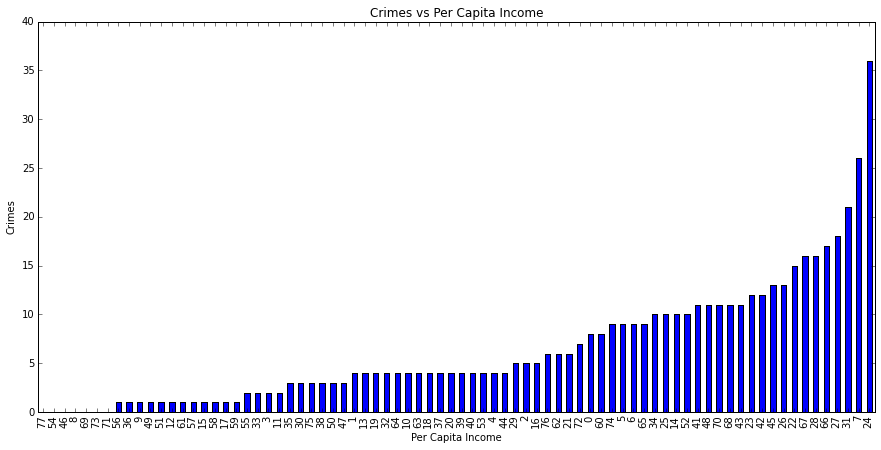

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


columns = ['area_name','per_capita_income','crimes']
index = np.arange(80) # array of number of samples
df = pd.DataFrame(columns=columns, index = index)
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""
counter = 0
with open("ChicagoSocialEconomicInfo.rdf") as f:
    
    for line in f:
        s = df.xs(counter)
        if "<ds:community_area_name>" in line:
            areaName = find_between( line, "<ds:community_area_name>", "</ds:community_area_name>" )
            areaName = areaName.rstrip()
            s.area_name = areaName
            #print areaName here
        if "<ds:per_capita_income_>" in line:
            perCapitaIncome = find_between( line, "<ds:per_capita_income_>","</ds:per_capita_income_>")
            s.per_capita_income = perCapitaIncome
            s.crimes=0
            df.append(s)
            counter += 1
            #print per capita income here

with open("ChicageCriminalInfo.rdf") as f:
    
    for line in f:
        if "<ds:community_area>" in line:
            areaNumber = find_between( line, "<ds:community_area>", "</ds:community_area>" )
            areaNumber = int(areaNumber)
            #print crimes in areaName
            df['crimes'][areaNumber-1]=df['crimes'][areaNumber-1]+1


df2 = df.ix[:77]            
print df2
my_plot = df2.sort(columns='crimes',ascending=True).plot(kind='bar',legend=None,title="Crimes vs Per Capita Income",figsize=(15, 7))

my_plot.set_xlabel("Per Capita Income")
my_plot.set_ylabel("Crimes")   

#autolayout labels should not be cutoff
rcParams.update({'figure.autolayout': True})
#initialize matplotlib
plt.figure()

#display graph
plt.show()
plt.close()  
            
            